# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np
import pandas as pd

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

SOL:
    - two equations:
    
$$\frac{dS}{dt} = -\beta SI + \gamma I$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

    
    
    - first equation: growth in the number of infected; 
    - second equation: growth in the number of susceptible
            
            
    - beta: probability of getting infected by interacting with a infected if one is susceptible (infection rate)
    - gamma: probability of becoming susceptible if one is infected (recovery rate)
    - high gamma: means that the infected are not a long time infectious, but are quickly susceptible again. 
    Quick recovery rate
    - high beta: the disease is highly infectious. It spreads quickly.     
        

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

Alpha: rate at which people move from R to S

$$\frac{dS}{dt} = \alpha R - \beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I - \alpha R$$

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

Sol:
    1. A: around 2/3; B around 15%; C little bit more than 50% 
    2. both strategies choose a node randomly (uniform dist), but in strategy C a neighbor of the random node is picked. Strategy C uses the fact that links are not uniformly dist. and therefore, it is more likely to pick a high degree node.
    3. The BA network has a stronger variation in node degree than the ER, hence it is more likely to choose a
    high degree node with strategy C and the effect is stronger.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

-1 How herd immunity works: disease can die out even if not all the people are vaccinated and immune. At one point the links between non-infected but non-immune person is really sparse and the remaning infected person recover without infecting any other person.

-2 Epodemonic: it shows a SIRS model. with transmission rate = beta; recovery rate = gamma; waning immunity rate = alpha. The model converges then to an equlibrium, at which newly infected balance with new susceptibles (lost immunity). It is possible that the disease dies out, but also that every new susceptible is infected instantly. The quasi-equlibrium strongly depends on the parameters.   

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

Answer: If the time horizon is long enough it makes perfectly sense that at the end all individuals are infected, since the infected are not recovering in this model. Hence, at every iteraton at least as much as before are infected. Even with a really low probability of transmission at some point all persons with any link to the network with patience 0 should be infected. 

In [2]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

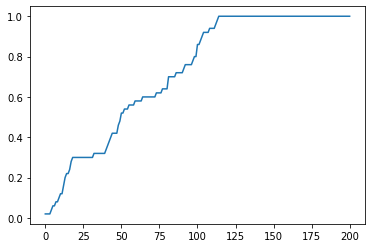

In [3]:
p_I = 0.1 # probability of being infected when in contact with an infected
n_iter = 200 # time horizon --> how many times an infected person can transmit the disease

T_I = 10 # days after infected nodes become susceptible again
I = set()  # all infected persons/ nodes ; initially empty
S = set(G.nodes()) # all nodes are initially susceptibles

# from all nodes choose randomly one person that is patient zero, who is the first infected. (the bat eater)
patient0 = np.random.choice(list(S))

# infected node is added to the infected set & removed from the susceptible set
I.add(patient0)
S.remove(patient0)

I_frac = []
frac = len(I) / (len(I) + len(S))
I_frac.append(frac)

for t in range(n_iter):  # loop over time horizon / how many times the infected can transmit the disease to its neighbors
    for infected_node in list(I): # every infected person/ node could potentially transmit the disease to its neighbors
        neighbors = G.neighbors(infected_node) # take the persons which are connected to infected persons
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # the neighbors are infected with probability p_I for each connected infected node
        # this can be simulated by taking randomly a number between 0 and 1, if it is smaller than the p_I, the person is infected
        
        # update the I and S set with the newly infected nodes
        I |= infected_neighbors
        S -= infected_neighbors
    frac = len(I) / (len(I) + len(S))
    I_frac.append(frac)

plt.plot(I_frac) 

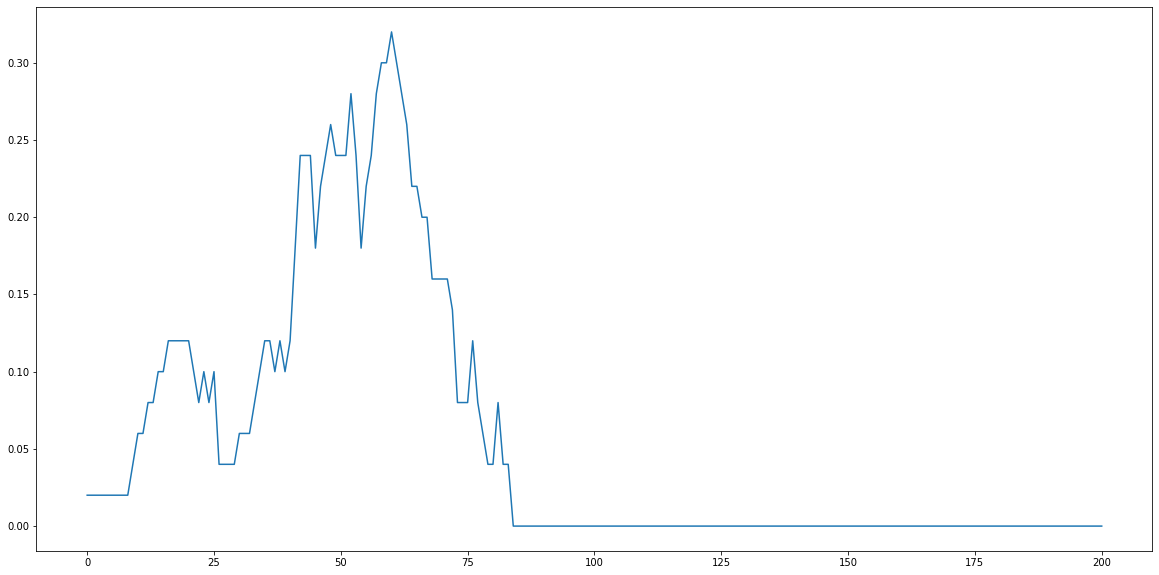

In [16]:
# 3. 


p_I = 0.1 # probability of being infected when in contact with an infected
n_iter = 200 # time horizon --> how many times an infected person can transmit the disease
T_I = 10 # days after infected nodes become susceptible again


I = set()  # all infected persons/ nodes ; initially empty
S = set(G.nodes()) # all nodes are initially susceptibles

# from all nodes choose randomly one person that is patient zero, who is the first infected. (the bat eater)
patient0 = np.random.choice(list(S))

# infected node is added to the infected set & removed from the susceptible set
I.add(patient0)
S.remove(patient0)

I_frac = []
frac = len(I) / (len(I) + len(S))
I_frac.append(frac)

newly_I={}
newly_I["0"]={patient0}
for t in range(n_iter):  # loop over time horizon / how many times the infected can transmit the disease to its neighbors
    I_n = set()
    for infected_node in list(I): # every infected person/ node could potentially transmit the disease to its neighbors
        neighbors = G.neighbors(infected_node) # take the persons which are connected to infected persons
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # the neighbors are infected with probability p_I for each connected infected node
        # this can be simulated by taking randomly a number between 0 and 1, if it is smaller than the p_I, the person is infected
        # update the I and S set with the newly infected nodes        
        I |= infected_neighbors
        S -= infected_neighbors
        I_n |= infected_neighbors

    frac = len(I) / (len(I) + len(S))
    I_frac.append(frac)

    newly_I["{0}".format(t+1)] = I_n
    if "{0}".format(t-T_I) in newly_I:       
        I -= set(newly_I.get("{0}".format(t-T_I)))
        S |= set(newly_I.get("{0}".format(t-T_I))) 
        
plt.figure(figsize=(20,10))        
plt.plot(I_frac)        

In [17]:
# 3. with a function.. Why does it yield a different solution?!

def frac_infected(p_I, T_I, n_iter = 200):
    I = set()  # all infected persons/ nodes ; initially empty
    S = set(G.nodes()) # all nodes are initially susceptibles

    # from all nodes choose randomly one person that is patient zero, who is the first infected. (the bat eater)
    patient0 = np.random.choice(list(S))

    # infected node is added to the infected set & removed from the susceptible set
    I.add(patient0)
    S.remove(patient0)

    I_frac = []
    frac = len(I) / (len(I) + len(S))
    I_frac.append(frac)

    newly_I={}
    newly_I["0"]={patient0}
    
    for t in range(n_iter):  # loop over time horizon / how many times the infected can transmit the disease to its neighbors
        I_n = set()
        for infected_node in list(I): # every infected person/ node could potentially transmit the disease to its neighbors
            neighbors = G.neighbors(infected_node) # take the persons which are connected to infected persons
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # the neighbors are infected with probability p_I for each connected infected node
            # this can be simulated by taking randomly a number between 0 and 1, if it is smaller than the p_I, the person is infected
            # update the I and S set with the newly infected nodes        
            I |= infected_neighbors
            S -= infected_neighbors
            I_n |= infected_neighbors

        frac = len(I) / (len(I) + len(S))
        I_frac.append(frac)
        newly_I["{0}".format(t+1)] = I_n
        if "{0}".format(t-T_I) in newly_I:       
            I -= set(newly_I.get("{0}".format(t-T_I)))
            S |= set(newly_I.get("{0}".format(t-T_I)))
            
    plt.figure(figsize=(20,10))        
    plt.plot(I_frac)        

In [18]:
from ipywidgets import interact, widgets

widgets.interact(frac_infected,
    p_I=widgets.FloatSlider(description="P_I", min=0, max=1, step=0.05, value=0.1),
    T_I=widgets.FloatSlider(description="T_I", min=0, max=100, step=1, value=10),
    n_iter=200             
)

interactive(children=(FloatSlider(value=0.1, description='P_I', max=1.0, step=0.05), FloatSlider(value=10.0, d…

<function __main__.frac_infected(p_I, T_I, n_iter=200)>

In [19]:
# don't understandt why it now converges to 1 in contrast to when I run it without function... Do you know why?

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [20]:
# load data

from datetime import datetime as dt


data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

def create_slice(data, t0, t1): 
    if isinstance(t0, str):
        t0 = dt.timestamp(dt.fromisoformat(t0)) 
    if isinstance(t1, str):
        t1 = dt.timestamp(dt.fromisoformat(t1))
        
    slice = data.loc[data.timestamp.between(t0, t1)]
    slice = slice.groupby(['user1', 'user2']).size().reset_index(name='weight')
    return nx.from_pandas_edgelist(slice, 'user1', 'user2', create_using=nx.Graph)

G_year= create_slice(data, data.timestamp.max() - 86400 * 365, data.timestamp.max())


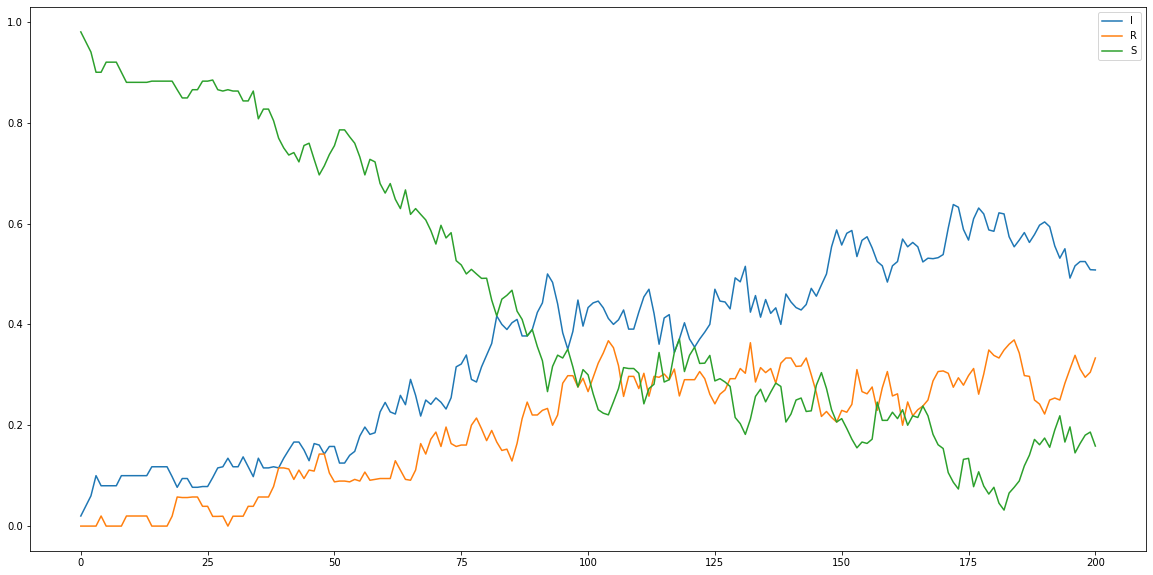

In [21]:
# 
#parameters
p_I = 0.1 # probability of being infected 
p_R = 0.1 # prob of recovering
p_S = 0.1 # prob of becoming susceptible
n_iter = 200 # time horizon 

I = set()  # set of infected
S = set(G.nodes()) # set of susceptibles
R = set()  # set of recovered


patient0 = np.random.choice(list(S))  # patient zero

# infected node is added to the infected set & removed from the susceptible set
I.add(patient0)
S.remove(patient0)

I_frac = []
frac_i = len(I) / (len(I) + len(S) + len(R))
I_frac.append(frac_i)

S_frac = []
frac_s = len(S) / (len(I) + len(S) + len(R))
S_frac.append(frac_s)

R_frac = []
frac_r = len(R) / (len(I) + len(S) + len(R))
R_frac.append(frac_r)

for t in range(n_iter):  # 
    for infected_node in list(I): # 
        neighbors = G.neighbors(infected_node) # 
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # 
        
        I |= infected_neighbors
        S -= infected_neighbors
    
    # recovering
    recovered = set([n for n in list(I) if np.random.random() < p_R]) # 
        
    R |= recovered
    I -= recovered
        
    # becoming susceptible again
    susceptible = set([n for n in list(R) if np.random.random() < p_S]) # 
        
    S |= susceptible
    R -= susceptible    
    
    # fractions
    frac_i = len(I) / (len(I) + len(S) + len(R))
    I_frac.append(frac_i)
    
    frac_s = len(S) / (len(I) + len(S) + len(R))
    S_frac.append(frac_s)
    
    frac_r = len(R) / (len(I) + len(S) + len(R))
    R_frac.append(frac_r)

plt.figure(figsize=(20,10))   
plt.plot(I_frac, label='I') 
plt.plot(R_frac, label='R') 
plt.plot(S_frac, label='S')
plt.legend()

In [22]:
# function

def SIRS(p_I, p_R, p_S, n_iter=200):
    I = set()  # set of infected
    S = set(G.nodes()) # set of susceptibles
    R = set()  # set of recovered


    patient0 = np.random.choice(list(S))  # patient zero

    # infected node is added to the infected set & removed from the susceptible set
    I.add(patient0)
    S.remove(patient0)

    I_frac = []
    frac_i = len(I) / (len(I) + len(S) + len(R))
    I_frac.append(frac_i)

    S_frac = []
    frac_s = len(S) / (len(I) + len(S) + len(R))
    S_frac.append(frac_s)

    R_frac = []
    frac_r = len(R) / (len(I) + len(S) + len(R))
    R_frac.append(frac_r)

    for t in range(n_iter):  # 
        for infected_node in list(I): # 
            neighbors = G.neighbors(infected_node) # 
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) # 

            I |= infected_neighbors
            S -= infected_neighbors

        # recovering
        recovered = set([n for n in list(I) if np.random.random() < p_R]) # 

        R |= recovered
        I -= recovered

        # becoming susceptible again
        susceptible = set([n for n in list(R) if np.random.random() < p_S]) # 

        S |= susceptible
        R -= susceptible    

        # fractions
        frac_i = len(I) / (len(I) + len(S) + len(R))
        I_frac.append(frac_i)

        frac_s = len(S) / (len(I) + len(S) + len(R))
        S_frac.append(frac_s)

        frac_r = len(R) / (len(I) + len(S) + len(R))
        R_frac.append(frac_r)

    plt.figure(figsize=(20,10))
    plt.plot(I_frac, label='I') 
    plt.plot(R_frac, label='R') 
    plt.plot(S_frac, label='S')
    plt.legend()

In [23]:
widgets.interact(SIRS,
    p_I=widgets.FloatSlider(description="P_I", min=0, max=1, step=0.05, value=0.1),
    p_R=widgets.FloatSlider(description="P_I", min=0, max=1, step=0.05, value=0.1),
    p_S=widgets.FloatSlider(description="P_I", min=0, max=1, step=0.05, value=0.1),             
    n_iter=200             
)

interactive(children=(FloatSlider(value=0.1, description='P_I', max=1.0, step=0.05), FloatSlider(value=0.1, de…

<function __main__.SIRS(p_I, p_R, p_S, n_iter=200)>

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.